## Video Game Sales Analysis

Author: Nat Berryman

In [1]:
# importing the packages we will be using for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib import rcParams
import seaborn as sns
import seaborn as sb
sb.set()
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn import linear_model
from statsmodels.formula.api import ols
import sklearn.metrics as metrics

from scipy import stats 
import math

import pylab

%matplotlib inline

In [2]:
vg_sales = pd.read_csv('./data/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [3]:
vg_sales.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
vg_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [5]:
drop_cols = ['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Count', 'User_Count', 'Developer', 'Rating']

vg_sales.drop(drop_cols, axis=1, inplace=True)

In [6]:
vg_sales

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii,2006.0,Sports,Nintendo,82.53,76.0,8.0
1,NES,1985.0,Platform,Nintendo,40.24,NaN,NaN
2,Wii,2008.0,Racing,Nintendo,35.52,82.0,8.3
3,Wii,2009.0,Sports,Nintendo,32.77,80.0,8.0
4,GB,1996.0,Role-Playing,Nintendo,31.37,NaN,NaN
...,...,...,...,...,...,...,...
16714,PS3,2016.0,Action,Tecmo Koei,0.01,NaN,NaN
16715,X360,2006.0,Sports,Codemasters,0.01,NaN,NaN
16716,PSV,2016.0,Adventure,Idea Factory,0.01,NaN,NaN
16717,GBA,2003.0,Platform,Wanadoo,0.01,NaN,NaN


In [7]:
vg_sales.isnull().sum()

Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
Global_Sales          0
Critic_Score       8582
User_Score         9129
dtype: int64

In [8]:
vg_sales['Year_of_Release'] = vg_sales['Year_of_Release'].fillna(vg_sales['Year_of_Release'].mean())
vg_sales['Critic_Score'] = vg_sales['Critic_Score'].fillna(vg_sales['Critic_Score'].mean())
vg_sales['User_Score'] = vg_sales['User_Score'].fillna(vg_sales['User_Score'].mean())

In [9]:
vg_sales.isnull().sum()

Platform            0
Year_of_Release     0
Genre               2
Publisher          54
Global_Sales        0
Critic_Score        0
User_Score          0
dtype: int64

In [10]:
vg_sales = vg_sales.dropna()
vg_sales.isnull().sum()

Platform           0
Year_of_Release    0
Genre              0
Publisher          0
Global_Sales       0
Critic_Score       0
User_Score         0
dtype: int64

In [11]:
publishers = vg_sales['Publisher'].unique()
platforms = vg_sales['Platform'].unique()
genres = vg_sales['Genre'].unique()

print("Number of games: ", len(vg_sales))
print("Number of platforms: ", len(platforms))
print("Number of genres: ", len(genres))
print("Number of publishers: ", len(publishers))

Number of games:  16663
Number of platforms:  31
Number of genres:  12
Number of publishers:  582


In [12]:
vg_sales['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [13]:
vg_sales['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [14]:
vg_sales['Publisher'].unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment', 'Square Enix',
       'Sony Computer Entertainment Europe', 'Virgin Interactive',
       'LucasArts', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       'Codemasters', 'Majesco Entertainment', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       'NCSoft', '989 Studios', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'ASCII Entertainment', 'Valve Software',
     

In [15]:
vg_sales['Publisher'].value_counts()

Electronic Arts                 1356
Activision                       985
Namco Bandai Games               939
Ubisoft                          933
Konami Digital Entertainment     834
                                ... 
Locus                              1
Warp                               1
Valve                              1
Elite                              1
Red Flagship                       1
Name: Publisher, Length: 582, dtype: int64

In [16]:
counts = vg_sales['Publisher'].value_counts()
vg_sales['Publisher'] = vg_sales['Publisher'].apply(lambda x: ('Sml_Publisher' if counts[x] < 100 else ('Med_Publisher' if counts[x] < 500 else 'Lge_Publisher')))

C:\Users\shann\AppData\Local\Temp/ipykernel_24200/1081158235.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vg_sales['Publisher'] = vg_sales['Publisher'].apply(lambda x: ('Sml_Publisher' if counts[x] < 100 else ('Med_Publisher' if counts[x] < 500 else 'Lge_Publisher')))


In [17]:
vg_sales['Publisher'].value_counts()

Lge_Publisher    7793
Sml_Publisher    4535
Med_Publisher    4335
Name: Publisher, dtype: int64

In [18]:
vg_sales.head()

,Platform,Year_of_Release,Genre,Publisher,Global_Sales,Critic_Score,User_Score
0,Wii,2006.0,Sports,Lge_Publisher,82.53,76.000000,8.000000
1,NES,1985.0,Platform,Lge_Publisher,40.24,68.967679,7.125046
2,Wii,2008.0,Racing,Lge_Publisher,35.52,82.000000,8.300000
3,Wii,2009.0,Sports,Lge_Publisher,32.77,80.000000,8.000000
4,GB,1996.0,Role-Playing,Lge_Publisher,31.37,68.967679,7.125046


In [19]:
vg_sales['User_Score'] = vg_sales['User_Score'] * 10
vg_sales['User_Score'].head()

C:\Users\shann\AppData\Local\Temp/ipykernel_24200/3914858693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vg_sales['User_Score'] = vg_sales['User_Score'] * 10


0    80.000000
1    71.250461
2    83.000000
3    80.000000
4    71.250461
Name: User_Score, dtype: float64

In [20]:
onehot_columns = ['Platform', 'Genre', 'Publisher']

In [21]:
def onehot_encode(vg_sales, columns):
    for column in columns:
        dummies = pd.get_dummies(vg_sales[column])
        vg_sales = pd.concat([vg_sales, dummies], axis=1)
        vg_sales.drop(column, axis=1, inplace=True)
    return vg_sales

In [22]:
vg_sales = onehot_encode(vg_sales, onehot_columns)

In [23]:
vg_sales.head()

,Year_of_Release,Global_Sales,Critic_Score,User_Score,2600,3DO,3DS,DC,DS,GB,...,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher
0,2006.0,82.53,76.000000,80.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,1985.0,40.24,68.967679,71.250461,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2008.0,35.52,82.000000,83.000000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,2009.0,32.77,80.000000,80.000000,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1996.0,31.37,68.967679,71.250461,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [24]:
vg_sales.rename(columns = {'Role-Playing':'Role_Playing'}, inplace = True)
vg_sales.rename(columns = {'2600':'_2600_'}, inplace = True)
vg_sales.rename(columns = {'3DO':'_3DO_'}, inplace = True)
vg_sales.rename(columns = {'3DS':'_3DS_'}, inplace = True)

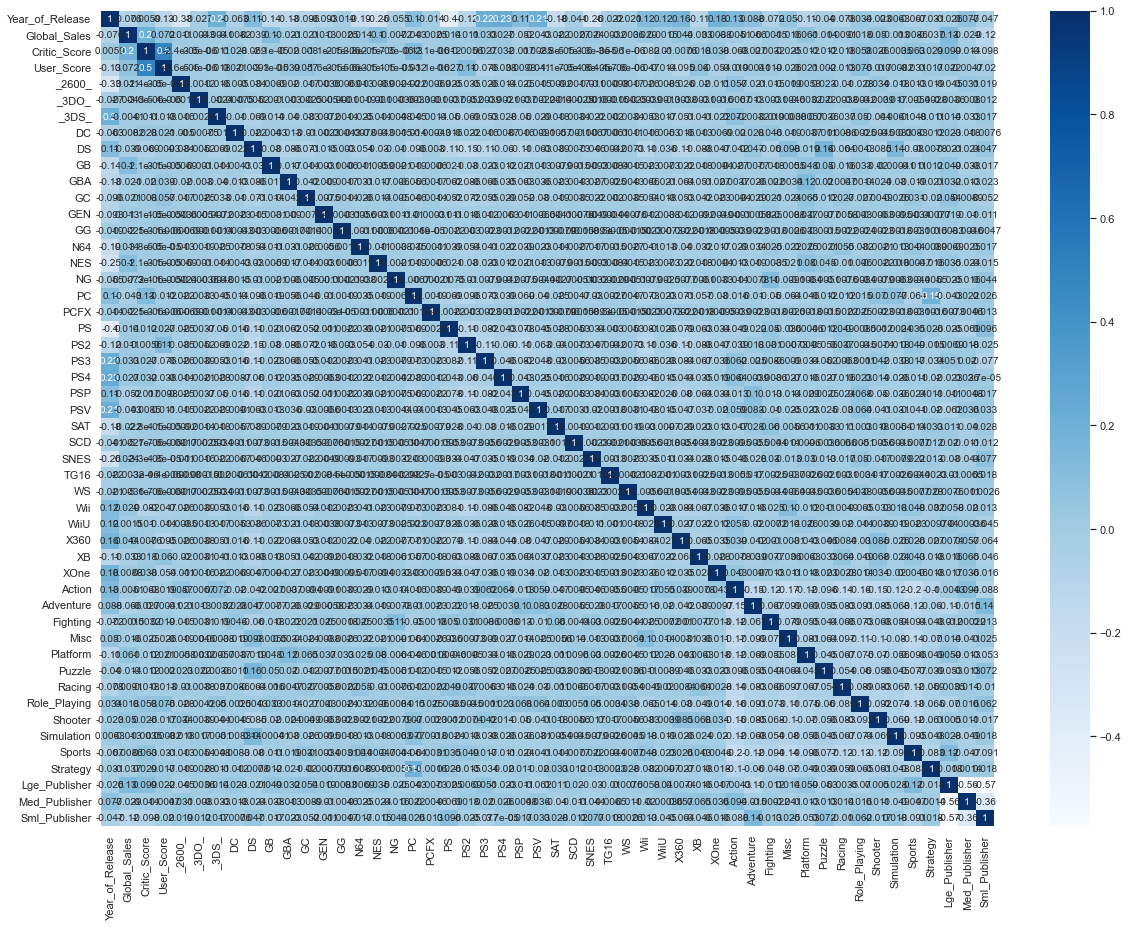

In [25]:
corr = vg_sales.corr()
f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr, cmap="Blues", annot=True);

In [26]:
df_cont = vg_sales[['Global_Sales', 'Year_of_Release','Critic_Score','User_Score']]
df_cat = vg_sales[['_2600_', '_3DO_', '_3DS_', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG','N64','NES','NG','PC','PCFX','PS','PS2',
               'PS3','PS4','PSP','PSV','SAT','SCD','SNES','TG16','WS','Wii','WiiU','X360','XB','XOne','Action','Adventure',
               'Fighting','Misc','Platform','Puzzle','Racing','Role_Playing','Shooter','Simulation','Sports','Strategy',
               'Lge_Publisher','Med_Publisher','Sml_Publisher']]

In [27]:
df_cont.head()

,Global_Sales,Year_of_Release,Critic_Score,User_Score
0,82.53,2006.0,76.000000,80.000000
1,40.24,1985.0,68.967679,71.250461
2,35.52,2008.0,82.000000,83.000000
3,32.77,2009.0,80.000000,80.000000
4,31.37,1996.0,68.967679,71.250461


In [28]:
df_cont = df_cont[df_cont['User_Score'] !=0]

In [29]:
log_names = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_names

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

df_log_norm = df_log.apply(normalize)

df_log_norm.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,User_Score_log
0,4.211132,-0.082332,0.671605,0.673635
1,3.720525,-3.694355,0.072503,0.074220
2,3.635309,0.259696,1.140456,0.864153
3,3.580270,0.430582,0.988096,0.673635
4,3.550449,-1.797603,0.072503,0.074220


In [30]:
df_log_norm.describe()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,User_Score_log
count,1.666200e+04,1.666200e+04,1.666200e+04,1.666200e+04
mean,-2.059529e-13,1.807687e-12,3.889196e-12,3.398532e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.948487e+00,-4.559992e+00,-1.022370e+01,-1.841691e+01
25%,-7.246961e-01,-5.960138e-01,7.250306e-02,7.421999e-02
50%,-1.337166e-02,8.872457e-02,7.250306e-02,7.421999e-02
75%,6.812056e-01,6.013833e-01,1.641760e-01,1.997598e-01
max,4.211132e+00,2.304737e+00,2.240289e+00,1.670808e+00


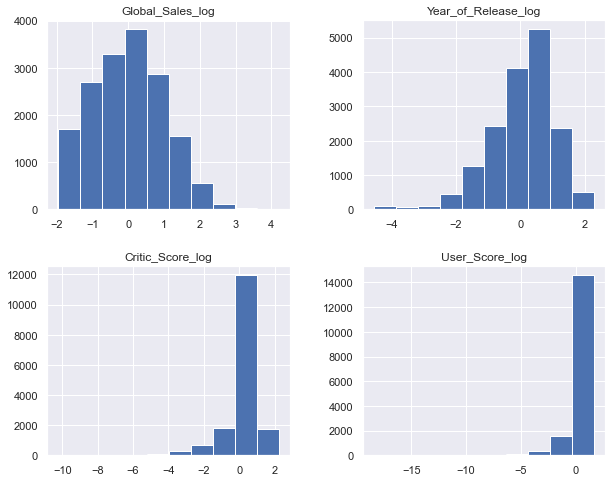

In [31]:
df_log_norm.hist(figsize=(10,8));

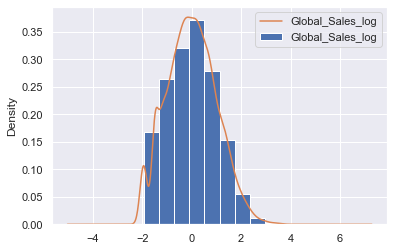

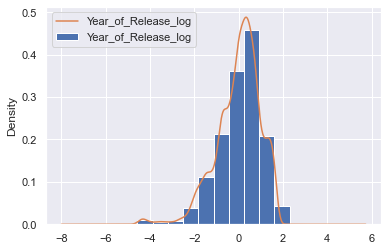

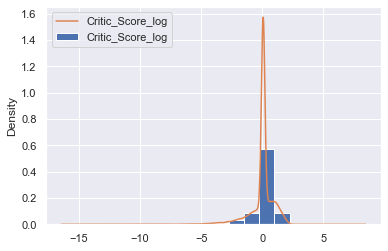

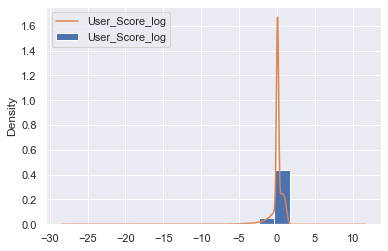

In [32]:
x = list(df_log_norm)
for column in x:
    df_log_norm[column].plot.hist(density=True)
    df_log_norm[column].plot.kde(label=column)
    plt.legend()
    plt.show()

No handles with labels found to put in legend.


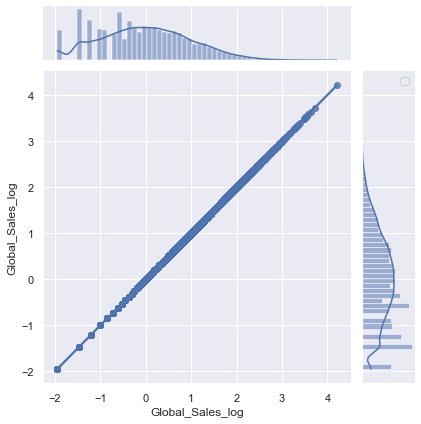

No handles with labels found to put in legend.


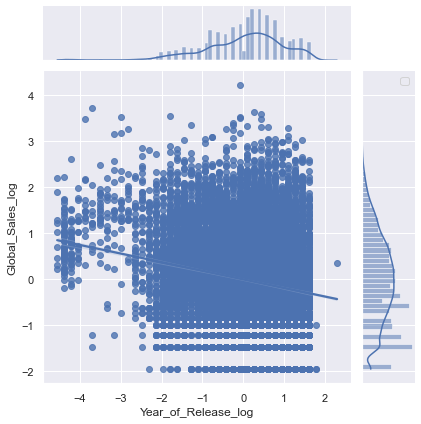

No handles with labels found to put in legend.


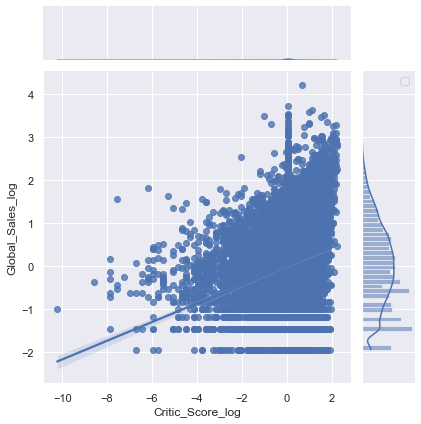

No handles with labels found to put in legend.


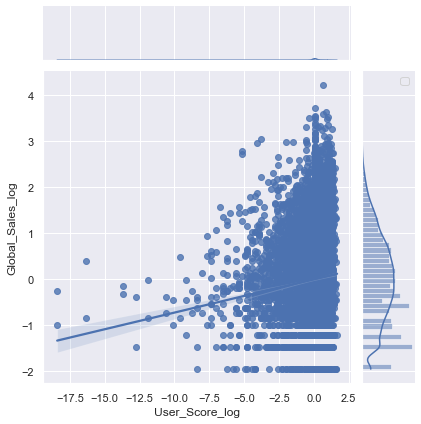

In [33]:
for column in x:
    sns.jointplot(x = column, y='Global_Sales_log', data=df_log_norm, kind = 'reg', label = column)
    plt.legend()
    plt.show()

In [34]:
df_merged = pd.concat([df_log_norm,df_cat], axis = 1)
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,User_Score_log,_2600_,_3DO_,_3DS_,DC,DS,GB,...,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher
0,4.211132,-0.082332,0.671605,0.673635,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3.720525,-3.694355,0.072503,0.074220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.635309,0.259696,1.140456,0.864153,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3.580270,0.430582,0.988096,0.673635,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3.550449,-1.797603,0.072503,0.074220,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [35]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16663 entries, 0 to 16718
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_Sales_log     16662 non-null  float64
 1   Year_of_Release_log  16662 non-null  float64
 2   Critic_Score_log     16662 non-null  float64
 3   User_Score_log       16662 non-null  float64
 4   _2600_               16663 non-null  uint8  
 5   _3DO_                16663 non-null  uint8  
 6   _3DS_                16663 non-null  uint8  
 7   DC                   16663 non-null  uint8  
 8   DS                   16663 non-null  uint8  
 9   GB                   16663 non-null  uint8  
 10  GBA                  16663 non-null  uint8  
 11  GC                   16663 non-null  uint8  
 12  GEN                  16663 non-null  uint8  
 13  GG                   16663 non-null  uint8  
 14  N64                  16663 non-null  uint8  
 15  NES                  16663 non-null 

In [36]:
cols = df_merged.describe().columns[1:4]

results = [['ind var','r_squared','intercept','slope','p-value']]
for idx, val in enumerate(cols):
    print('Global_Sales_log~' + val)
    f = 'Global_Sales_log~' +val
    model = smf.ols(formula=f, data=df_merged).fit()
    X_new = pd.DataFrame({val: [df_merged[val].min(), df_merged[val].max()]});
    pred = model.predict(X_new)
    results.append([val,model.rsquared,model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])
    print(model.summary())

Global_Sales_log~Year_of_Release_log
['Year_of_Release_log', 0.03465495564892063, 2.3924354793265767e-13, -0.18615841546630302, 8.439379342488517e-130]
                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.035
Method:                 Least Squares   F-statistic:                     598.1
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          8.44e-130
Time:                        09:15:14   Log-Likelihood:                -23348.
No. Observations:               16662   AIC:                         4.670e+04
Df Residuals:                   16660   BIC:                         4.672e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


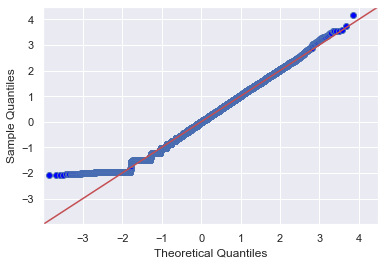

In [37]:
residuals = model.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [38]:
f = 'Global_Sales_log ~ ' + ' + '.join(cols)
model_2 = ols(formula=f, data=df_merged).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     516.9
Date:                Sun, 12 Jun 2022   Prob (F-statistic):          3.33e-321
Time:                        09:15:15   Log-Likelihood:                -22900.
No. Observations:               16662   AIC:                         4.581e+04
Df Residuals:                   16658   BIC:                         4.584e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept           -4.815e-13      0.007   -6.5e-11      1.000      -0.015       0.015
Year_of_Release_log    -0.1936      0.007    -25.875      0.000      -0.208      -0.179
Critic_Score_log        0.2475      0.008     29.567      0.000       0.231       0.264
User_Score_log         -0.0656      0.008     -7.779      0.000      -0.082      -0.049
==============================================================================
Omnibus:                      147.456   Durbin-Watson:                   0.166
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.206
Skew:                           0.104   Prob(JB):                     1.17e-24
Kurtosis:                       2.660   Cond. No.                         1.68
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


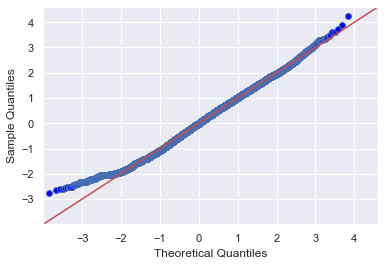

In [39]:
residuals = model_2.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [40]:
c_platform = df_merged.columns[4:35]
c_genre = df_merged.columns[35:47]
c_publisher = df_merged.columns[47:50]

In [41]:
cols = [c_platform, c_genre, c_publisher]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_3 = smf.ols(formula=f, data=df_merged).fit()
    print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.119
Model:                            OLS   Adj. R-squared:                  0.117
Method:                 Least Squares   F-statistic:                     74.73
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:15:16   Log-Likelihood:                -22588.
No. Observations:               16662   AIC:                         4.524e+04
Df Residuals:                   16631   BIC:                         4.548e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.715e+11   5.73e+11      0.823      0.4

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


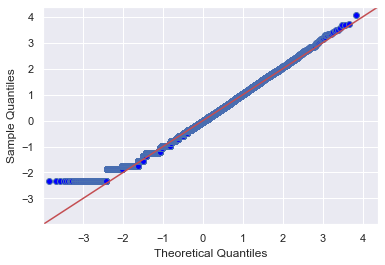

In [42]:
residuals = model_3.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [43]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16663 entries, 0 to 16718
Data columns (total 50 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_Sales_log     16662 non-null  float64
 1   Year_of_Release_log  16662 non-null  float64
 2   Critic_Score_log     16662 non-null  float64
 3   User_Score_log       16662 non-null  float64
 4   _2600_               16663 non-null  uint8  
 5   _3DO_                16663 non-null  uint8  
 6   _3DS_                16663 non-null  uint8  
 7   DC                   16663 non-null  uint8  
 8   DS                   16663 non-null  uint8  
 9   GB                   16663 non-null  uint8  
 10  GBA                  16663 non-null  uint8  
 11  GC                   16663 non-null  uint8  
 12  GEN                  16663 non-null  uint8  
 13  GG                   16663 non-null  uint8  
 14  N64                  16663 non-null  uint8  
 15  NES                  16663 non-null 

In [44]:
all_cols = df_merged.columns[1:50]

In [45]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_4 = smf.ols(formula=f, data=df_merged).fit()
    print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     147.8
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:15:17   Log-Likelihood:                -20785.
No. Observations:               16662   AIC:                         4.166e+04
Df Residuals:                   16615   BIC:                         4.203e+04
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            2.026e+12   5

C:\Users\shann\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


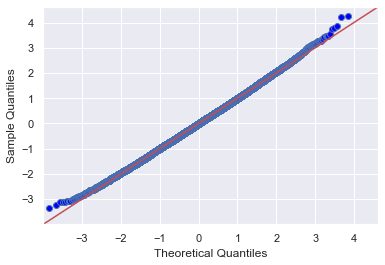

In [46]:
residuals = model_4.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [47]:
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,User_Score_log,_2600_,_3DO_,_3DS_,DC,DS,GB,...,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher
0,4.211132,-0.082332,0.671605,0.673635,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3.720525,-3.694355,0.072503,0.074220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.635309,0.259696,1.140456,0.864153,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3.580270,0.430582,0.988096,0.673635,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3.550449,-1.797603,0.072503,0.074220,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [48]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,User_Score_log,_2600_,_3DO_,_3DS_,DC,DS,GB,GBA,...,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher
0,-0.082332,0.671605,0.673635,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,-3.694355,0.072503,0.074220,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.259696,1.140456,0.864153,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.430582,0.988096,0.673635,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,-1.797603,0.072503,0.074220,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [49]:
y.head()

,Global_Sales_log
0,4.211132
1,3.720525
2,3.635309
3,3.580270
4,3.550449


In [50]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log    0
Critic_Score_log       0
User_Score_log         0
_2600_                 0
_3DO_                  0
_3DS_                  0
DC                     0
DS                     0
GB                     0
GBA                    0
GC                     0
GEN                    0
GG                     0
N64                    0
NES                    0
NG                     0
PC                     0
PCFX                   0
PS                     0
PS2                    0
PS3                    0
PS4                    0
PSP                    0
PSV                    0
SAT                    0
SCD                    0
SNES                   0
TG16                   0
WS                     0
Wii                    0
WiiU                   0
X360                   0
XB                     0
XOne                   0
Action                 0
Adventure              0
Fighting               0
Misc                   0
Platform               0
Puzzle                 0


In [51]:
np.any(np.isnan(y))

True

In [52]:
np.any(np.isnan(y))

True

In [53]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [54]:
np.any(np.isnan(y))

False

In [55]:
np.all(np.isfinite(y))

True

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [57]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [58]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [59]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.19140625]
 [-1.13085938]
 [ 0.1015625 ]
 ...
 [ 0.08203125]
 [ 0.12890625]
 [ 0.68164062]]


In [60]:
r2_score(y_test,y_pred)

0.2782209632859166

C:\Users\shann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\shann\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


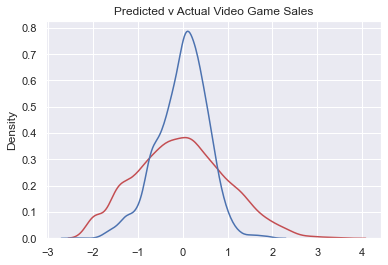

In [61]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [62]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [63]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Sml_Publisher                  with p-value 0.0
Add  Year_of_Release_log            with p-value 1.45084e-164
Add  Critic_Score_log               with p-value 6.86309e-159
Add  PC                             with p-value 1.86003e-106
Add  Adventure                      with p-value 2.86433e-94
Add  Lge_Publisher                  with p-value 8.55771e-52
Add  X360                           with p-value 6.8214e-49
Add  PS3                            with p-value 5.11128e-49
Add  Wii                            with p-value 7.4034e-36
Add  PS4                            with p-value 2.87826e-36
Add  PS2                            with p-value 3.26123e-24
Add  XOne                           with p-value 3.538e-25
Add  _3DS_                          with p-value 2.97334e-19
Add  Strategy                       with p-value 1.05089e-16
Add  GB                             with p-value 1.40526e-15
Add  SAT                            with p-value 1.07855e-12
Add  WiiU                        

In [64]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_5 = sm.OLS(y,X_with_intercept).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.286
Model:                            OLS   Adj. R-squared:                  0.285
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:15:45   Log-Likelihood:                -20836.
No. Observations:               16662   AIC:                         4.173e+04
Df Residuals:                   16631   BIC:                         4.197e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.076e+12   9.61e+11     -3.201      0.001   -4.96e+12   -1.19e+12
Sml_Publisher        3.076e+12   9.61e+11      3.201      0.001    1.19e+12    4.96e+12
Year_of_Release_log    -0.2696      0.011    -24.669      0.000      -0.291      -0.248
Critic_Score_log        0.2274      0.008     29.760      0.000       0.212       0.242
PC                     -0.2869      0.032     -8.963      0.000      -0.350      -0.224
Adventure              -0.5569      0.028    -19.978      0.000      -0.612      -0.502
Lge_Publisher        3.076e+12   9.61e+11      3.201      0.001    1.19e+12    4.96e+12
X360                    0.7142      0.029     24.841      0.000       0.658       0.771
PS3                     0.6610      0.029     22.969      0.000       0.605       0.717
Wii                     0.5856      0.028     20.907      0.000       0.531       0.640
PS4                     0.7642      0.048     15.805      0.000       0.669       0.859
PS2                     0.3674      0.023     16.216      0.000       0.323       0.412
XOne                    0.6882      0.058     11.780      0.000       0.574       0.803
_3DS_                   0.4332      0.042     10.295      0.000       0.351       0.516
Strategy               -0.3939      0.036    -10.984      0.000      -0.464      -0.324
GB                      0.8257      0.088      9.332      0.000       0.652       0.999
SAT                    -0.3319      0.068     -4.862      0.000      -0.466      -0.198
WiiU                    0.5010      0.073      6.873      0.000       0.358       0.644
DS                      0.2088      0.024      8.744      0.000       0.162       0.256
NES                     0.6454      0.093      6.910      0.000       0.462       0.828
PS                      0.2345      0.031      7.509      0.000       0.173       0.296
Puzzle                 -0.3131      0.039     -8.119      0.000      -0.389      -0.238
Misc                   -0.2167      0.025     -8.616      0.000      -0.266      -0.167
Sports                 -0.1920      0.023     -8.461      0.000      -0.236      -0.148
User_Score_log         -0.0400      0.008     -5.259      0.000      -0.055      -0.025
N64                     0.2716      0.051      5.338      0.000       0.172       0.371
SNES                    0.2183      0.061      3.605      0.000       0.100       0.337
Simulation             -0.1723      0.032     -5.306      0.000      -0.236      -0.109
Racing                 -0.1465      0.028     -5.252      0.000      -0.201      -0.092
Action                 -0.0877      0.020     -4.294      0.000      -0.128      -0.048
Med_Publisher        3.076e+12   9.61e+11      3.201      0.001    1.19e+12    4.96e+12
Fighting               -0.0927      0.032     -2.859      0.004      -0.156      -0.029
===

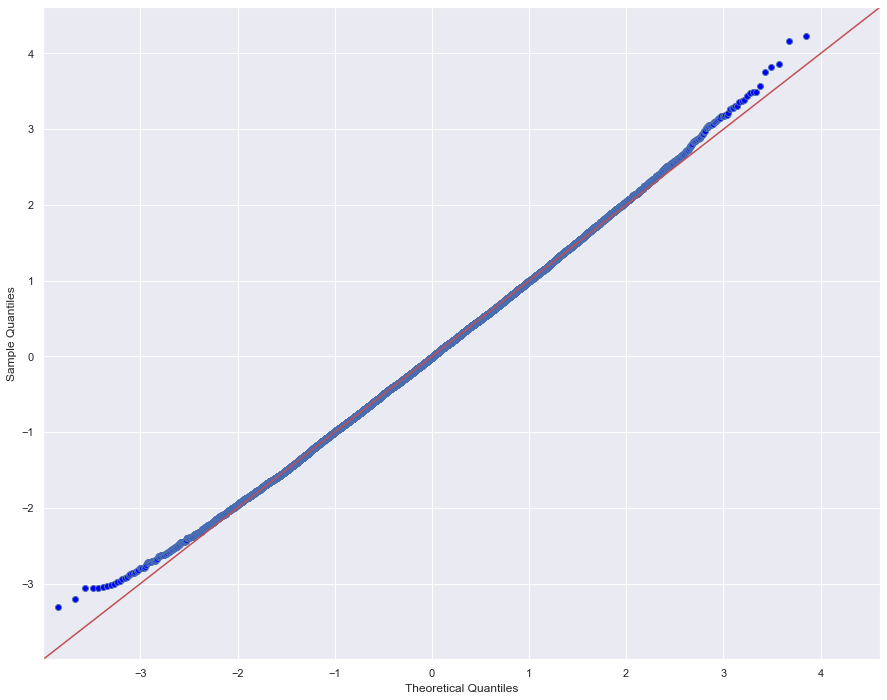

In [65]:
residuals = model_5.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [66]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,User_Score_log,_2600_,_3DO_,_3DS_,DC,DS,GB,GBA,...,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher
0,-0.082332,0.671605,0.673635,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,-3.694355,0.072503,0.074220,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.259696,1.140456,0.864153,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0.430582,0.988096,0.673635,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,-1.797603,0.072503,0.074220,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0


In [67]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log    0
Critic_Score_log       0
User_Score_log         0
_2600_                 0
_3DO_                  0
_3DS_                  0
DC                     0
DS                     0
GB                     0
GBA                    0
GC                     0
GEN                    0
GG                     0
N64                    0
NES                    0
NG                     0
PC                     0
PCFX                   0
PS                     0
PS2                    0
PS3                    0
PS4                    0
PSP                    0
PSV                    0
SAT                    0
SCD                    0
SNES                   0
TG16                   0
WS                     0
Wii                    0
WiiU                   0
X360                   0
XB                     0
XOne                   0
Action                 0
Adventure              0
Fighting               0
Misc                   0
Platform               0
Puzzle                 0


In [68]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [69]:
np.any(np.isnan(y))

False

In [70]:
np.all(np.isfinite(y))

True

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [72]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [73]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [74]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.19140625]
 [-1.13085938]
 [ 0.1015625 ]
 ...
 [ 0.08203125]
 [ 0.12890625]
 [ 0.68164062]]


In [75]:
r2_score(y_test,y_pred)

0.2782209632859166

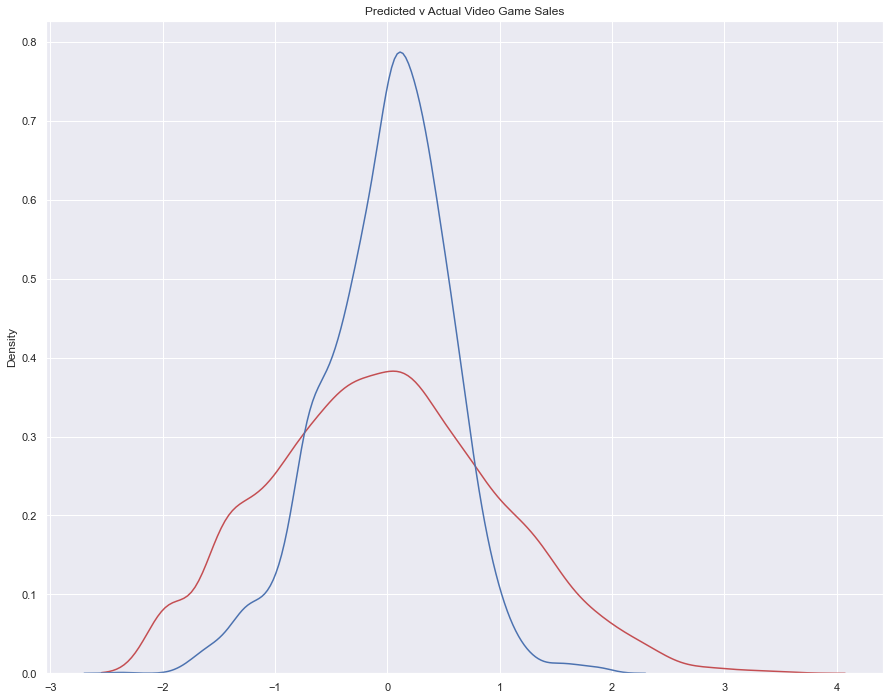

In [76]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [77]:
df_merged.head()

,Global_Sales_log,Year_of_Release_log,Critic_Score_log,User_Score_log,_2600_,_3DO_,_3DS_,DC,DS,GB,...,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher
0,4.211132,-0.082332,0.671605,0.673635,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1,3.720525,-3.694355,0.072503,0.074220,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3.635309,0.259696,1.140456,0.864153,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,3.580270,0.430582,0.988096,0.673635,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,3.550449,-1.797603,0.072503,0.074220,0,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [78]:
sum_col = df_merged['Wii'] + df_merged['NES'] + df_merged['GB'] + df_merged['DS'] + df_merged['SNES'] + df_merged['GBA'] + df_merged['_3DS_'] + df_merged['N64'] + df_merged['WiiU'] + df_merged['SCD'] + df_merged['GC']
df_merged['Nintendo'] = sum_col

In [79]:
sum_col = df_merged['PS3']+df_merged['PS2']+ df_merged['PS4']+ df_merged['PS']+df_merged['PSP']+df_merged['PSV']
df_merged['Sony'] = sum_col

In [80]:
sum_col = df_merged['SAT']+df_merged['GG']+df_merged['DC']+df_merged['GEN']
df_merged['Sega'] = sum_col

In [81]:
sum_col = df_merged['X360']+df_merged['XB']+df_merged['XOne']
df_merged['Microsoft'] = sum_col

In [82]:
df_merged['Atari'] = df_merged['_2600_']

In [83]:
sum_col = df_merged['PCFX']+df_merged['TG16']+df_merged['NG']
df_merged['PC'] = sum_col

In [84]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16663 entries, 0 to 16718
Data columns (total 55 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_Sales_log     16662 non-null  float64
 1   Year_of_Release_log  16662 non-null  float64
 2   Critic_Score_log     16662 non-null  float64
 3   User_Score_log       16662 non-null  float64
 4   _2600_               16663 non-null  uint8  
 5   _3DO_                16663 non-null  uint8  
 6   _3DS_                16663 non-null  uint8  
 7   DC                   16663 non-null  uint8  
 8   DS                   16663 non-null  uint8  
 9   GB                   16663 non-null  uint8  
 10  GBA                  16663 non-null  uint8  
 11  GC                   16663 non-null  uint8  
 12  GEN                  16663 non-null  uint8  
 13  GG                   16663 non-null  uint8  
 14  N64                  16663 non-null  uint8  
 15  NES                  16663 non-null 

In [85]:
df_merged = df_merged.drop(df_merged.columns[4:35], axis=1)

In [86]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16663 entries, 0 to 16718
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Global_Sales_log     16662 non-null  float64
 1   Year_of_Release_log  16662 non-null  float64
 2   Critic_Score_log     16662 non-null  float64
 3   User_Score_log       16662 non-null  float64
 4   Action               16663 non-null  uint8  
 5   Adventure            16663 non-null  uint8  
 6   Fighting             16663 non-null  uint8  
 7   Misc                 16663 non-null  uint8  
 8   Platform             16663 non-null  uint8  
 9   Puzzle               16663 non-null  uint8  
 10  Racing               16663 non-null  uint8  
 11  Role_Playing         16663 non-null  uint8  
 12  Shooter              16663 non-null  uint8  
 13  Simulation           16663 non-null  uint8  
 14  Sports               16663 non-null  uint8  
 15  Strategy             16663 non-null 

In [87]:
all_cols = df_merged.columns[1:24]

In [88]:
cols = [all_cols]
for col in cols:
    sum_cols = '+'.join(col)
    f = 'Global_Sales_log ~' + sum_cols
    model_6 = smf.ols(formula=f, data=df_merged).fit()
    print(model_6.summary())

                            OLS Regression Results                            
Dep. Variable:       Global_Sales_log   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     247.0
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:15:55   Log-Likelihood:                -21381.
No. Observations:               16662   AIC:                         4.281e+04
Df Residuals:                   16640   BIC:                         4.298e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            3.856e+12   9

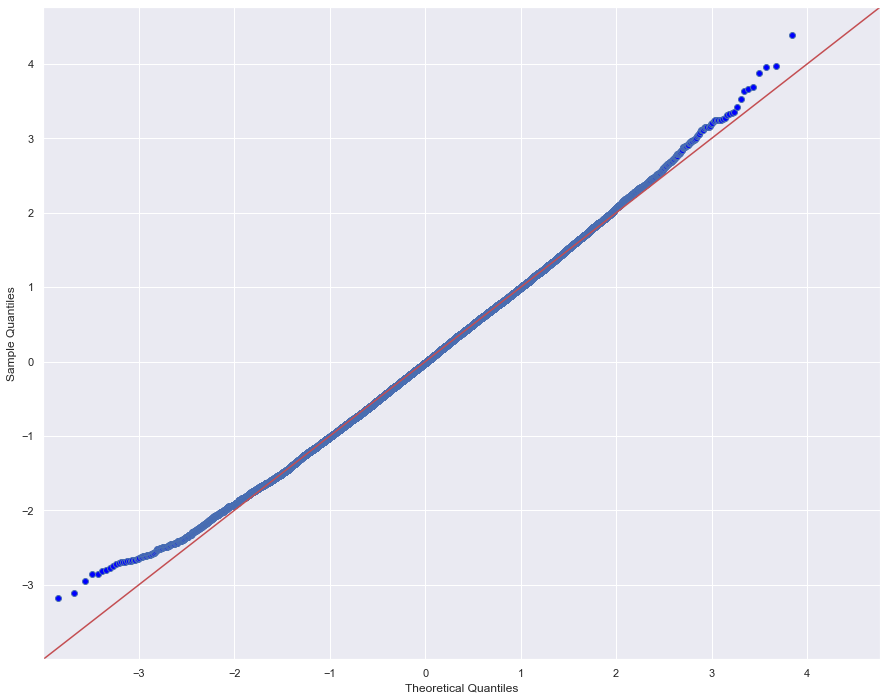

In [89]:
residuals = model_6.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [90]:
y = df_merged[['Global_Sales_log']]
X = df_merged.drop(['Global_Sales_log'],axis=1)
X.head()

,Year_of_Release_log,Critic_Score_log,User_Score_log,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,...,Sports,Strategy,Lge_Publisher,Med_Publisher,Sml_Publisher,Nintendo,Sony,Sega,Microsoft,Atari
0,-0.082332,0.671605,0.673635,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
1,-3.694355,0.072503,0.074220,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0.259696,1.140456,0.864153,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3,0.430582,0.988096,0.673635,0,0,0,0,0,0,0,...,1,0,1,0,0,1,0,0,0,0
4,-1.797603,0.072503,0.074220,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0


In [91]:
list(X.columns)

['Year_of_Release_log',
 'Critic_Score_log',
 'User_Score_log',
 'Action',
 'Adventure',
 'Fighting',
 'Misc',
 'Platform',
 'Puzzle',
 'Racing',
 'Role_Playing',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Lge_Publisher',
 'Med_Publisher',
 'Sml_Publisher',
 'Nintendo',
 'Sony',
 'Sega',
 'Microsoft',
 'Atari']

In [92]:
X = X.dropna()
X.isnull().sum()

Year_of_Release_log    0
Critic_Score_log       0
User_Score_log         0
Action                 0
Adventure              0
Fighting               0
Misc                   0
Platform               0
Puzzle                 0
Racing                 0
Role_Playing           0
Shooter                0
Simulation             0
Sports                 0
Strategy               0
Lge_Publisher          0
Med_Publisher          0
Sml_Publisher          0
Nintendo               0
Sony                   0
Sega                   0
Microsoft              0
Atari                  0
dtype: int64

In [93]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [94]:
np.any(np.isnan(y))

False

In [95]:
np.all(np.isfinite(y))

True

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [97]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [98]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [99]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.12890625]
 [-0.83105469]
 [-0.08398438]
 ...
 [ 0.21386719]
 [ 0.24707031]
 [ 0.34375   ]]


In [100]:
r2_score(y_test,y_pred)

0.22232977518464447

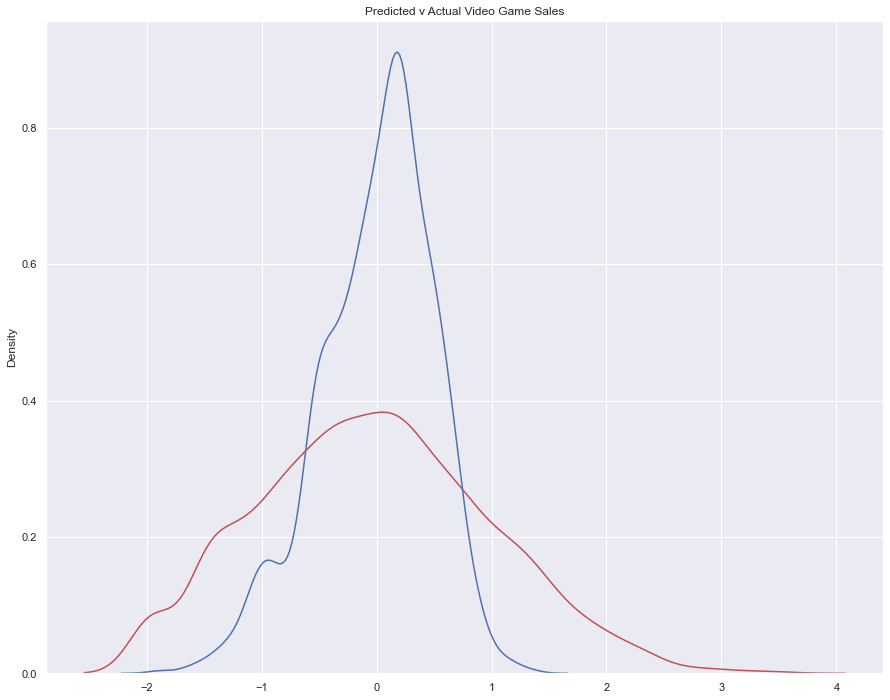

In [101]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [102]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [103]:
import warnings
warnings.filterwarnings('ignore')

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  Sml_Publisher                  with p-value 0.0
Add  Year_of_Release_log            with p-value 1.45084e-164
Add  Critic_Score_log               with p-value 6.86309e-159
Add  Adventure                      with p-value 4.809e-87
Add  Lge_Publisher                  with p-value 1.61221e-55
Add  Strategy                       with p-value 5.08495e-37
Add  Microsoft                      with p-value 1.36534e-19
Add  Sony                           with p-value 3.44691e-25
Add  Nintendo                       with p-value 1.10224e-66
Add  User_Score_log                 with p-value 1.6006e-15
Add  Atari                          with p-value 3.72177e-13
Add  Shooter                        with p-value 3.10778e-10
Add  Puzzle                         with p-value 2.96146e-09
Add  Misc                           with p-value 1.90323e-05
Add  Sports                         with p-value 2.94466e-05
Add  Med_Publisher                  with p-value 0.000370409
Add  Simulation                  

In [104]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model_7 = sm.OLS(y,X_with_intercept).fit()
model_7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Global_Sales_log   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     287.7
Date:                Sun, 12 Jun 2022   Prob (F-statistic):               0.00
Time:                        09:16:34   Log-Likelihood:                -21385.
No. Observations:               16662   AIC:                         4.281e+04
Df Residuals:                   16643   BIC:                         4.296e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -3.502e+12    9.8e+11     -3.575      0.000   -5.42e+12   -1.58e+12
Sml_Publisher        3.502e+12    9.8e+11      3.575      0.000    1.58e+12    5.42e+12
Year_of_Release_log    -0.1942      0.008    -25.325      0.000      -0.209      -0.179
Critic_Score_log        0.2369      0.008     30.307      0.000       0.222       0.252
Adventure              -0.5702      0.027    -21.169      0.000      -0.623      -0.517
Lge_Publisher        3.502e+12    9.8e+11      3.575      0.000    1.58e+12    5.42e+12
Strategy               -0.3494      0.036     -9.720      0.000      -0.420      -0.279
Microsoft               0.7425      0.034     21.749      0.000       0.676       0.809
Sony                    0.6589      0.031     21.339      0.000       0.598       0.719
Nintendo                0.6131      0.031     19.584      0.000       0.552       0.674
User_Score_log         -0.0648      0.008     -8.323      0.000      -0.080      -0.050
Atari                   0.6555      0.087      7.550      0.000       0.485       0.826
Shooter                 0.1010      0.027      3.781      0.000       0.049       0.153
Puzzle                 -0.2792      0.038     -7.275      0.000      -0.354      -0.204
Misc                   -0.1405      0.024     -5.893      0.000      -0.187      -0.094
Sports                 -0.1108      0.021     -5.188      0.000      -0.153      -0.069
Med_Publisher        3.502e+12    9.8e+11      3.575      0.000    1.58e+12    5.42e+12
Simulation             -0.1141      0.032     -3.584      0.000      -0.176      -0.052
Racing                 -0.0881      0.027     -3.239      0.001      -0.141      -0.035
Sega                    0.1700      0.064      2.657      0.008       0.045       0.295
==============================================================================
Omnibus:                       58.049   Durbin-Watson:                   0.461
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.380
Skew:                           0.141   Prob(JB):                     2.10e-13
Kurtosis:                       2.930   Cond. No.                     3.84e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.99e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

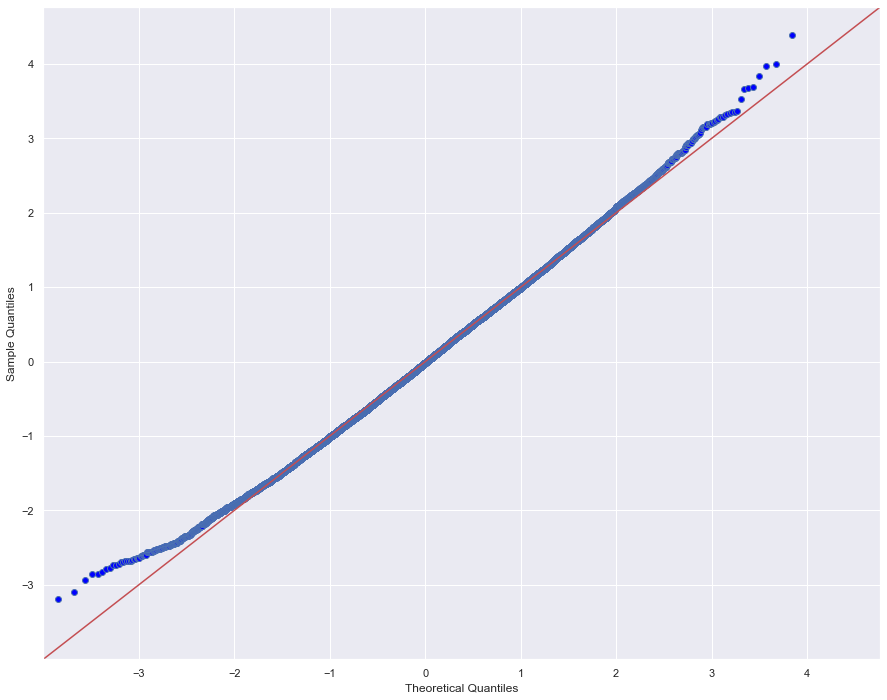

In [105]:
residuals = model_7.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
plt.show()

In [106]:
linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_

array([False, False, False, False, False, False, False,  True, False,
       False, False,  True, False, False, False,  True,  True,  True,
       False, False, False, False, False])

In [107]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression()

In [108]:
yhat = linreg.predict(X[selected_columns])

In [109]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [110]:
r_squared

Global_Sales_log    0.111512
dtype: float64

In [111]:
adjusted_r_squared

Global_Sales_log    0.111246
dtype: float64

In [112]:
df_model = df_merged[['Sml_Publisher', 'Year_of_Release_log', 'Critic_Score_log', 'Adventure', 'Lge_Publisher', 'Strategy', 'Microsoft', 'Sony', 'Nintendo', 'User_Score_log', 'Atari', 'Shooter', 'Puzzle', 'Misc', 'Sports', 'Med_Publisher', 'Simulation', 'Racing', 'Sega']]
df_model.head()

,Sml_Publisher,Year_of_Release_log,Critic_Score_log,Adventure,Lge_Publisher,Strategy,Microsoft,Sony,Nintendo,User_Score_log,Atari,Shooter,Puzzle,Misc,Sports,Med_Publisher,Simulation,Racing,Sega
0,0,-0.082332,0.671605,0,1,0,0,0,1,0.673635,0,0,0,0,1,0,0,0,0
1,0,-3.694355,0.072503,0,1,0,0,0,1,0.074220,0,0,0,0,0,0,0,0,0
2,0,0.259696,1.140456,0,1,0,0,0,1,0.864153,0,0,0,0,0,0,0,1,0
3,0,0.430582,0.988096,0,1,0,0,0,1,0.673635,0,0,0,0,1,0,0,0,0
4,0,-1.797603,0.072503,0,1,0,0,0,1,0.074220,0,0,0,0,0,0,0,0,0


In [113]:
y = df_merged[['Global_Sales_log']]
X = df_model

In [114]:
X = X.dropna()
X.isnull().sum()

Sml_Publisher          0
Year_of_Release_log    0
Critic_Score_log       0
Adventure              0
Lge_Publisher          0
Strategy               0
Microsoft              0
Sony                   0
Nintendo               0
User_Score_log         0
Atari                  0
Shooter                0
Puzzle                 0
Misc                   0
Sports                 0
Med_Publisher          0
Simulation             0
Racing                 0
Sega                   0
dtype: int64

In [115]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [116]:
np.any(np.isnan(y))

False

In [117]:
np.all(np.isfinite(y))

True

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [119]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [120]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [121]:
y_pred=ml.predict(X_test)
print(y_pred)

[[ 0.17089844]
 [-0.83105469]
 [-0.13183594]
 ...
 [ 0.234375  ]
 [ 0.26855469]
 [ 0.36425781]]


In [122]:
r2_score(y_test,y_pred)

0.22193453282609443

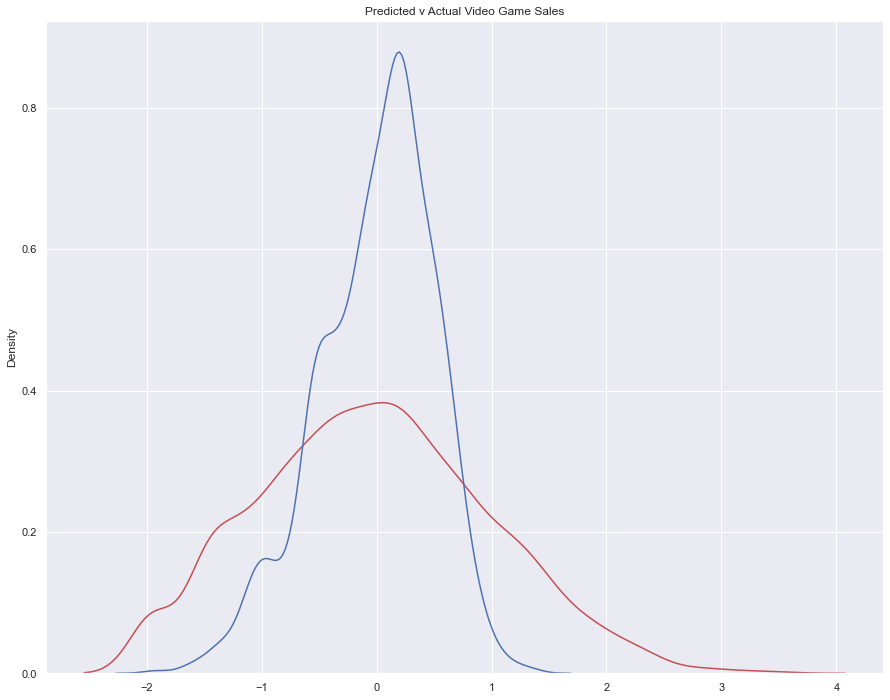

In [123]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()

In [124]:
df_model_final = df_model[['Sony','Shooter','Med_Publisher','Simulation','Racing']]
df_model_final.head()

,Sony,Shooter,Med_Publisher,Simulation,Racing
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,0,0,0
4,0,0,0,0,0


In [125]:
y = df_merged[['Global_Sales_log']]
X = df_model_final

In [126]:
X = X.dropna()
X.isnull().sum()

Sony             0
Shooter          0
Med_Publisher    0
Simulation       0
Racing           0
dtype: int64

In [127]:
y = y.dropna()
y.isnull().sum()

Global_Sales_log    0
dtype: int64

In [128]:
np.any(np.isnan(y))

False

In [129]:
np.all(np.isfinite(y))

True

In [130]:
X.shape

(16663, 5)

In [131]:
y.shape

(16662, 1)

In [132]:
X = X.iloc[:-1 , :]

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [134]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [135]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [136]:
y_pred=ml.predict(X_test)
print(y_pred)

[[-0.03704526]
 [ 0.03914684]
 [ 0.08049259]
 ...
 [-0.0971684 ]
 [-0.03704526]
 [-0.0971684 ]]


In [137]:
r2_score(y_test,y_pred)

0.00577623231759572

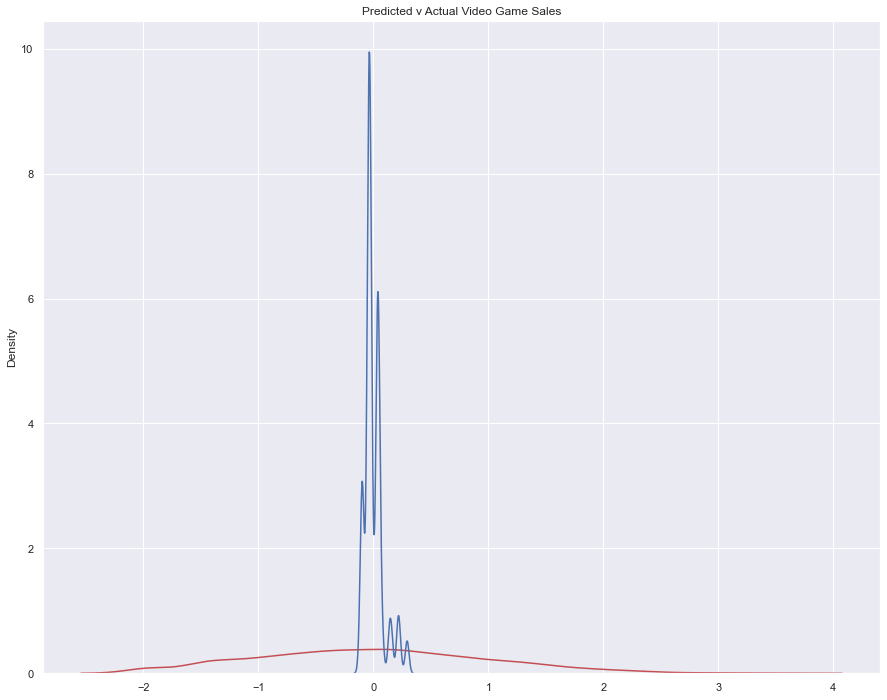

In [138]:
plt.title("Predicted v Actual Video Game Sales")
ax1=sns.distplot(y_test, color='r', hist=False)
sns.distplot(y_pred, color='b', hist=False, ax=ax1)
sns.set(rc = {'figure.figsize':(15,12)})
plt.show()